## Setup

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

from sklearn import preprocessing

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.model_selection import GridSearchCV

## Get the data

In [3]:
df = pd.read_csv("cars.数据清洗1.csv")
df = df[df['mileage(kilometers)']!= 9999999.0]
df = df.drop('Unnamed: 0', axis=1)
df.isnull().sum()
df

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,mazda,2,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,B
1,mazda,2,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,B
2,mazda,2,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,B
3,mazda,2,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,B
4,mazda,2,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,B
...,...,...,...,...,...,...,...,...,...,...,...,...
55936,lancia,zeta,3650,2000,with mileage,290000.0,petrol,2000.0,other,mechanics,front-wheel drive,M
55937,lancia,zeta,4100,1999,with mileage,340000.0,diesel,2100.0,blue,mechanics,front-wheel drive,M
55938,lancia,zeta,3600,1997,with mileage,354000.0,diesel,2100.0,burgundy,mechanics,front-wheel drive,M
55939,lancia,zeta,3000,1997,with mileage,350000.0,petrol,2000.0,blue,mechanics,front-wheel drive,M


## RandomForest Regression 

#### Train&Test Split

In [4]:
train, test = train_test_split(df, test_size=0.15, random_state=42)
x= train.drop(['priceUSD'],axis=1)
y= train.priceUSD

#### pre-processing data - LabelEncoder

In [5]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47549 entries, 1045 to 15795
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make                 47549 non-null  object 
 1   model                47549 non-null  object 
 2   year                 47549 non-null  int64  
 3   condition            47549 non-null  object 
 4   mileage(kilometers)  47549 non-null  float64
 5   fuel_type            47549 non-null  object 
 6   volume(cm3)          47549 non-null  float64
 7   color                47549 non-null  object 
 8   transmission         47549 non-null  object 
 9   drive_unit           47549 non-null  object 
 10  segment              47549 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 4.4+ MB


In [7]:
le = preprocessing.LabelEncoder()
objList = x.select_dtypes(include = "object").columns
for feat in objList:
    x[feat] = le.fit_transform(x[feat].astype(str))

In [8]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47549 entries, 1045 to 15795
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make                 47549 non-null  int32  
 1   model                47549 non-null  int32  
 2   year                 47549 non-null  int64  
 3   condition            47549 non-null  int32  
 4   mileage(kilometers)  47549 non-null  float64
 5   fuel_type            47549 non-null  int32  
 6   volume(cm3)          47549 non-null  float64
 7   color                47549 non-null  int32  
 8   transmission         47549 non-null  int32  
 9   drive_unit           47549 non-null  int32  
 10  segment              47549 non-null  int32  
dtypes: float64(2), int32(8), int64(1)
memory usage: 2.9 MB


#### pre-processing data - feature selection

In [311]:
# x2 = x.copy()
# x2['priceUSD'] = y
# data = x2.corr()
# data['priceUSD'].sort_values()

In [312]:
# x= x.drop(['condition','color','make'],axis=1)

#### Regressor - train & evaluation

In [9]:
regressor = RandomForestRegressor(random_state=42)
regressor.fit(x, y)
y_pred = regressor.predict(x)

In [10]:
some_data = x.iloc[:5]
some_labels = y.iloc[:5]
print("Predictions:\t", regressor.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [ 2955.36        8898.98       13242.5         3791.12
  1839.05238095]
Labels:		 [1521, 9000, 14500, 3990, 1500]


In [11]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y, y_pred)),2))
print('R2 score:', round(r2_score(y, y_pred),5))

Mean Absolute Error: 418.04
Mean Squared Error: 1151239.93
Root Mean Squared Error: 1072.96
R2 score: 0.98307


#### Improvement - cross validation(k-fold)

In [12]:
scores = cross_val_score(regressor, x, y,
                         scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-scores)

In [13]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(rmse_scores)

Scores: [3010.233307   3072.00871348 2767.73243527 2652.73702022 3188.25899731]
Mean: 2938.1940946542986
Standard deviation: 198.07643702994292


In [14]:
lin_reg = LinearRegression()
lin_reg.fit(x, y)
lin_scores = cross_val_score(lin_reg, x,y,scoring="neg_mean_squared_error", cv=5)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [5877.60422522 5929.25712934 5714.43271037 5979.14534397 6276.58367992]
Mean: 5955.40461776043
Standard deviation: 183.5884878917176


#### Adjust parameter  - grid search

In [18]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')

grid_search.fit(x, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [19]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [20]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

3437.802186517139 {'max_features': 2, 'n_estimators': 3}
3080.1072458173903 {'max_features': 2, 'n_estimators': 10}
2916.4994039985895 {'max_features': 2, 'n_estimators': 30}
3299.3808827527905 {'max_features': 4, 'n_estimators': 3}
2976.8176470344665 {'max_features': 4, 'n_estimators': 10}
2811.188933547781 {'max_features': 4, 'n_estimators': 30}
3346.5886136306044 {'max_features': 6, 'n_estimators': 3}
2910.4259161545774 {'max_features': 6, 'n_estimators': 10}
2823.577589841722 {'max_features': 6, 'n_estimators': 30}
3387.880934473622 {'max_features': 8, 'n_estimators': 3}
3023.879801553018 {'max_features': 8, 'n_estimators': 10}
2872.51677785608 {'max_features': 8, 'n_estimators': 30}
3413.007312803658 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
2951.7638272530357 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
3232.309687265242 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
2846.1185776480415 {'bootstrap': False, 'max_features': 3, 'n_estimato

#### model - test

In [21]:
final_model = grid_search.best_estimator_

X_test = test.drop("priceUSD", axis=1)
y_test = test["priceUSD"].copy()

In [22]:
X_test_tra = X_test.copy()
le = preprocessing.LabelEncoder()
objList = X_test_tra.select_dtypes(include = "object").columns
for feat in objList:
    X_test_tra[feat] = le.fit_transform(X_test_tra[feat].astype(str))

In [23]:
final_predictions = final_model.predict(X_test_tra)

print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, final_predictions),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, final_predictions),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, final_predictions)),2))
print('R2 score:', round(r2_score(y_test, final_predictions),5))

Mean Absolute Error: 1402.56
Mean Squared Error: 10023041.43
Root Mean Squared Error: 3165.92
R2 score: 0.86621


Text(0, 0.5, 'Price')

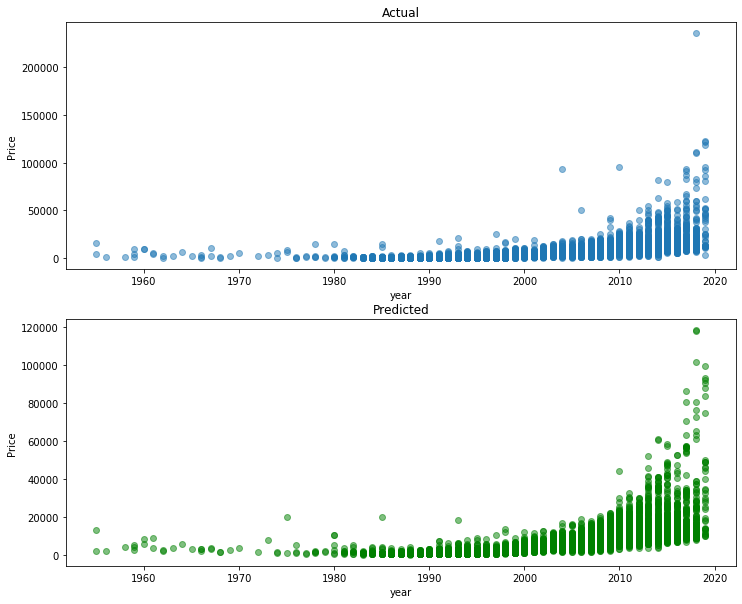

In [25]:
plt.figure(figsize=(12,10))

x_axis=X_test['year']
y_axis=y_test
plt.subplot(2, 1, 1)
plt.scatter(x_axis,y_axis,alpha=0.5)
plt.title('Actual')
plt.xlabel('year')
plt.ylabel('Price')

x_pre=X_test['year']
y_pre=final_predictions
plt.subplot(2, 1, 2)
plt.scatter(x_pre,y_pre,alpha=0.5,color='g')
plt.title('Predicted')
plt.xlabel('year')
plt.ylabel('Price')

## Overpriced

In [329]:
y_error = y_test-final_predictions
y_error

43234   -1249.966667
11500     555.000000
21582    -287.300000
32898    -888.333333
36827    -605.966667
            ...     
6417     -803.400000
52895    1087.133333
4459    -1968.633333
53063   -1882.966667
40327     167.600000
Name: priceUSD, Length: 8392, dtype: float64

In [335]:
y_error_sort = abs(y_error).sort_values(ascending=False)
y_error_sort

20667    108336.600000
20083     81070.066667
49003     59104.733333
50660     51708.500000
21967     46697.233333
             ...      
2098          1.600000
39494         1.400000
1621          1.000000
32176         0.633333
37088         0.033333
Name: priceUSD, Length: 8392, dtype: float64

In [379]:
makemodel = X_test.loc[y_error_sort.index]['make'] + " " + X_test.loc[y_error_sort.index]['model']
x_ax = pd.Series(makemodel[:10], name = 'makemodel')
y_ax = y_error_sort[:10]

In [380]:
x_ax

20667    bentley continental-gt
20083      mercedes-benz cl-amg
49003        volkswagen touareg
50660     mercedes-benz v-klass
21967          aston-martin dbs
41541                   audi q5
5841                porsche 911
32756                  lexus lx
21286        chevrolet corvette
51985       eksklyuziv vezdehod
Name: makemodel, dtype: object

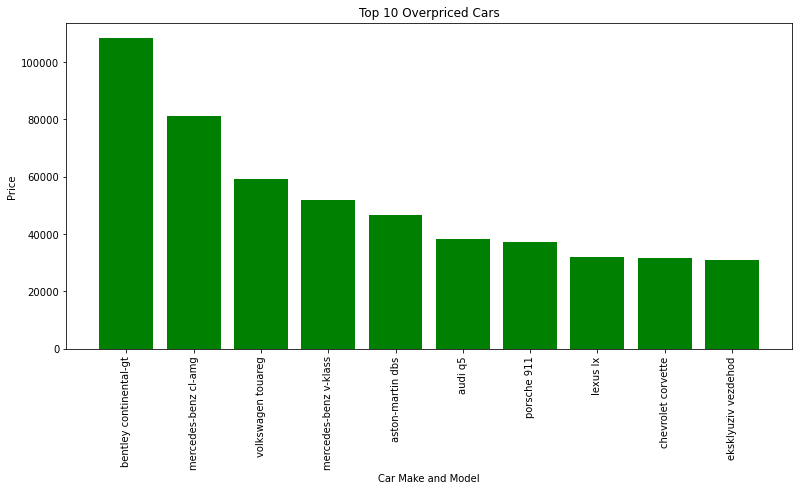

In [398]:
plt.figure(figsize=(13,6))
plt.title("Top 10 Overpriced Cars")
plt.bar(x_ax, y_ax, color="g", align="center")

plt.xticks(rotation=90)
plt.xlabel('Car Make and Model')
plt.ylabel('Price')
plt.show()